# PROJECT 3: UNDERSTANDING NUCLEOTIDE FREQUENCY ANALYSIS

Let's start by understanding Nucleotide Frequency Analysis

**What is Nucleotide Frequency Analysis?**

Nucleotide frequency analysis involves **counting the occurrences of each nucleotide (A, T, G, C) in a DNA sequence**. 

This analysis helps understand the composition of a DNA sequence, which can be useful for various applications, such as identifying species, studying genomic features, and designing primers for PCR.

**Steps to Perform Nucleotide Frequency Analysis**

1. Define a Function to Calculate Nucleotide Frequency
2. Parse the FASTA File and Use the Function
3. Print the Results

### Step 1: Import Libraries 

In [1]:
import Bio

In [2]:
# Importing necessary modules from Biopython
from Bio import SeqIO
from Bio import Entrez

### Step 3: Define a Function to Calculate Nucleotide Frequency

Here, we'll create a function that takes a DNA sequence as input and return a dictionary with the counts of each nucleotide

In [3]:
# Function to calculate nucleotide frequency
def calculate_nucleotide_frequency(sequence):
    freq = {
        "A": sequence.count("A"),
        "T": sequence.count("T"),
        "G": sequence.count("G"),
        "C": sequence.count("C")
    }
    return freq

### Step 4: Parse the FASTA File and Use the Function

In [4]:
# Function to parse a FASTA file and calculate nucleotide frequency
def parse_fasta_nucleotide_frequency(file_path):
    for record in SeqIO.parse(file_path, "fasta"):
        freq = calculate_nucleotide_frequency(record.seq)
        print(f"ID: {record.id}")
        print(f"Nucleotide Frequency: {freq}\n")

In [5]:
fasta_file = "Example1.fasta"

In [6]:
if fasta_file:
    parse_fasta_nucleotide_frequency(fasta_file)
else: 
    print("No data fetched")

ID: sequence1
Nucleotide Frequency: {'A': 9, 'T': 2, 'G': 6, 'C': 9}

ID: sequence2
Nucleotide Frequency: {'A': 7, 'T': 11, 'G': 6, 'C': 7}

ID: sequence3
Nucleotide Frequency: {'A': 14, 'T': 13, 'G': 11, 'C': 9}



# Calculate Nucleotide Composition Percentage

In [7]:
def calculate_nucleotide_composition(sequence):
    total_length = len(sequence)
    freq = {
        "A": round((sequence.count("A") / total_length) * 100,2),
        "T": round((sequence.count("T") / total_length) * 100,2),
        "G": round((sequence.count("G") / total_length) * 100,2),
        "C": round((sequence.count("C") / total_length) * 100,2)
    }
    return freq

In [8]:
def parse_fasta_nucleotide_composition(file_path):
    for record in SeqIO.parse(file_path, "fasta"):
        comp = calculate_nucleotide_composition(record.seq)
        print(f"ID: {record.id}")
        print(f"Nucleotide Composition (%): {comp}\n")

In [9]:
if fasta_file:
    parse_fasta_nucleotide_composition(fasta_file)
else: 
    print("No data fetched")

ID: sequence1
Nucleotide Composition (%): {'A': 34.62, 'T': 7.69, 'G': 23.08, 'C': 34.62}

ID: sequence2
Nucleotide Composition (%): {'A': 22.58, 'T': 35.48, 'G': 19.35, 'C': 22.58}

ID: sequence3
Nucleotide Composition (%): {'A': 29.79, 'T': 27.66, 'G': 23.4, 'C': 19.15}



# Visualization of Nucleotide Distribution 

To visualize the nucleotide distribution, we can use a bar plot. We'll use the matplotlib library to create a bar plot for the nucleotide composition.

**Step-by-Step Implementation for Visualization**
1. Install and Import Matplotlib
2. Create a Function to Plot Nucleotide Composition
3. Integrate the Plotting Function with FASTA Parsing

### Step 1: Install and Import Matplotlib

In [10]:
!pip install matplotlib

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#### Calculate Nucleotide Composition Percentage Function

In [25]:
## Already mentioned above as well
def calculate_nucleotide_composition(sequence):
    total_length = len(sequence)
    freq = {
        "A": round((sequence.count("A") / total_length) * 100, 2),
        "T": round((sequence.count("T") / total_length) * 100, 2),
        "G": round((sequence.count("G") / total_length) * 100, 2),
        "C": round((sequence.count("C") / total_length) * 100, 2)
    }
    return freq

#### Plot Nucleotide Composition

In [22]:
# Function to plot nucleotide composition
def plot_nucleotide_composition(comp, seq_id):
    nucleotides = list(comp.keys())
    frequencies = list(comp.values())
    
    # Create gradient colors
    base_color = np.array([0, 0, 1])  # Blue color in RGB
    gradient_colors = [base_color * (1 - i * 0.2) for i in range(len(nucleotides))]
    
    plt.figure(figsize=(5, 3))
    plt.bar(nucleotides, frequencies, color=gradient_colors)
    plt.xlabel('Nucleotide')
    plt.ylabel('Composition (%)')
    plt.title(f'Nucleotide Composition for {seq_id}')
    plt.show()

#### Parse FASTA File and Plot for Sequence1

In [23]:
def parse_fasta_nucleotide_composition_to_plot(file_path):
    for record in SeqIO.parse(file_path, "fasta"):
        comp = calculate_nucleotide_composition(record.seq)
        print(f"ID: {record.id}")
        print(f"Nucleotide Composition (%): {comp}\n")
        plot_nucleotide_composition(comp, record.id)
        break  # Only process the first sequence

ID: sequence1
Nucleotide Composition (%): {'A': 34.62, 'T': 7.69, 'G': 23.08, 'C': 34.62}



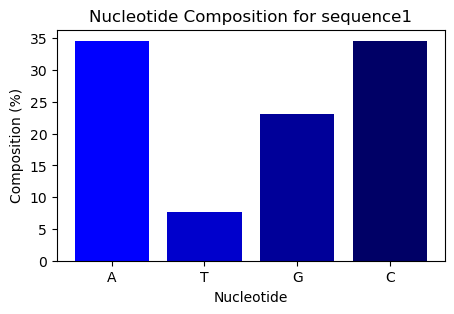

In [24]:
if fasta_file:
    parse_fasta_nucleotide_composition_to_plot(fasta_file)
else: 
    print("No data fetched")